In [9]:
from pandas import DataFrame, Series
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [11]:
# read in the main training csv
credit_card_bal = pd.read_csv('home-credit-default-risk/credit_card_balance.csv')

In [12]:
credit_card_bal['SK_ID_PREV'].nunique() # there are duplicates

104307

In [6]:
print(credit_card_bal.shape) # 23 columns
print(credit_card_bal[:5])
# Need to split the training data AFTER getting the desired data from the credit card balance table

(3840312, 23)
   SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                     

In [7]:
print(credit_card_bal.dtypes) # seems like only one categorical

SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
dtype: object


In [8]:
credit_card_bal.dtypes.value_counts()

float64    15
int64       7
object      1
dtype: int64

In [6]:
print(credit_card_bal['NAME_CONTRACT_STATUS'].nunique()) # contract status on the previous credit only cat variable
credit_card_bal['NAME_CONTRACT_STATUS'].value_counts() # No cancelled, unused offer

7


Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

## Initial observations
- It seems like SK_ID_CURR is the main identifier to join tables, but SK_ID_PREV may also match some in the application? (just previous credits)
- Only one categorical column - NAME_CONTRACT_STATUS - that need dummy variable
- None would be discriminatory

## Outlier Analysis

In [7]:
# basic stats - initial outlier analysis in CSV
# credit_card_bal.describe().to_csv(r'EDA-helpers\credit_card_bal_describe.csv', index = True, header = True)
credit_card_bal.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


## More observations
- Most skewness seems sensible (e.g., only few people would have excess days past due)
- Columns weird weirdly negative minimum numbers: AMT_BALANCE
- AMT_DRAWINGS_ATM_CURRENT
- AMT_DRAWINGS_CURRENT
- AMT_RECEIVABLE_PRINCIPAL
- AMT_RECIVABLE
- AMT_TOTAL_RECEIVABLE

2345 0.0006106274698514079


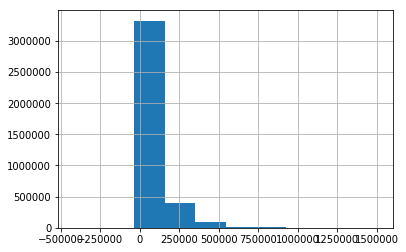

In [9]:
neg_balance = len(credit_card_bal[credit_card_bal['AMT_BALANCE'] < 0])
print(neg_balance, neg_balance / len(credit_card_bal) )
credit_card_bal['AMT_BALANCE'].hist()
# Actually a sizeable amount with negative balance
# Perhaps these are people who overpaid their bills?
# or issued a credit? could be important info

1 2.6039550953151724e-07
2047409   -6827.31
Name: AMT_DRAWINGS_ATM_CURRENT, dtype: float64


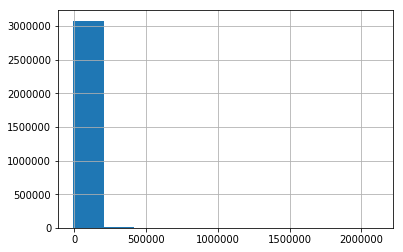

In [10]:
neg_atm_drawings_balance = len(credit_card_bal[credit_card_bal['AMT_DRAWINGS_ATM_CURRENT'] < 0])
print(neg_atm_drawings_balance, neg_atm_drawings_balance / len(credit_card_bal) )
print(credit_card_bal[credit_card_bal['AMT_DRAWINGS_ATM_CURRENT'] < 0]['AMT_DRAWINGS_ATM_CURRENT'])
credit_card_bal['AMT_DRAWINGS_ATM_CURRENT'].hist()

# Only one person had a negative number, at -6827
# This really doesn't make sense - how can you draw a negative amount of money from your ATM?

3 7.811865285945517e-07
438776    -1687.50
747302     -519.57
3284667   -6211.62
Name: AMT_DRAWINGS_CURRENT, dtype: float64


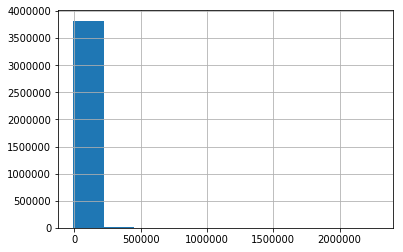

In [11]:
potential_outlier_column = 'AMT_DRAWINGS_CURRENT'
neg_drawings_balance = len(credit_card_bal[credit_card_bal[potential_outlier_column] < 0])
print(neg_drawings_balance, neg_drawings_balance / len(credit_card_bal) )
print(credit_card_bal[credit_card_bal[potential_outlier_column] < 0][potential_outlier_column])
credit_card_bal[potential_outlier_column].hist()

# Three people have negative numbers
# Are these savings? If so, doesn't make sense only three people saved; drop

2428 0.0006322402971425239


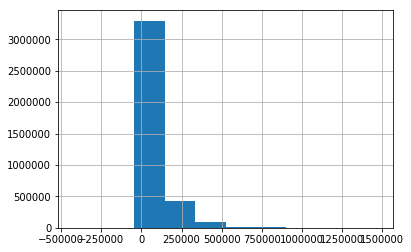

In [12]:
potential_outlier_column = 'AMT_RECEIVABLE_PRINCIPAL'
neg_receivable_principal = len(credit_card_bal[credit_card_bal[potential_outlier_column] < 0])
print(neg_receivable_principal, neg_receivable_principal / len(credit_card_bal) )
# print(credit_card_bal[credit_card_bal[potential_outlier_column] < 0][potential_outlier_column])
credit_card_bal[potential_outlier_column].hist()

# 2428 negative numbers
# Amount receiveables for principals... so these people don't have any receivables, but instead owe money? keep

109338 0.02847112422115703


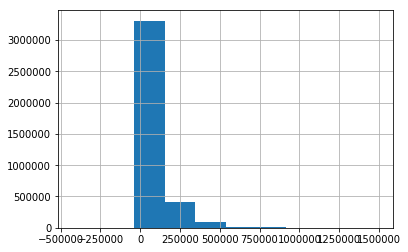

In [13]:
potential_outlier_column = 'AMT_RECIVABLE'
neg_receivable = len(credit_card_bal[credit_card_bal[potential_outlier_column] < 0])
print(neg_receivable, neg_receivable / len(credit_card_bal) )
credit_card_bal[potential_outlier_column].hist()

# 109338 negative numbers
# Same logic as principal - keep; also interestingly to note, the minium numbers for AMT bal and the tree receiveable
# numbers are the same

109330 0.028469041057080778


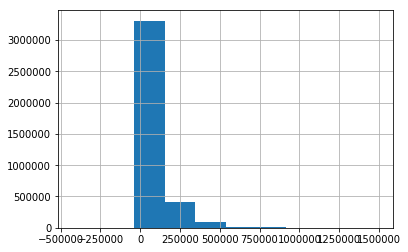

In [14]:
potential_outlier_column = 'AMT_TOTAL_RECEIVABLE'
neg_total_receivable = len(credit_card_bal[credit_card_bal[potential_outlier_column] < 0])
print(neg_total_receivable, neg_total_receivable / len(credit_card_bal) )
credit_card_bal[potential_outlier_column].hist()

# 109338 negative numbers
# Same logic as principal

In [13]:
# Drop outliers:
# Entries with negative numbers in AMT_DRAWINGS_ATM_CURRENT & AMT_DRAWINGS_CURRENT
credit_card_bal.drop(credit_card_bal[credit_card_bal['AMT_DRAWINGS_ATM_CURRENT'] < 0].index, axis = 0, inplace = True) 
credit_card_bal.drop(credit_card_bal[credit_card_bal['AMT_DRAWINGS_CURRENT'] < 0].index, axis = 0, inplace = True)
credit_card_bal.shape # Dropped 4 rows
# Maybe shouldn't drop from an individual user's perspective

(3840308, 23)

## Missing values

In [9]:
# rank % of missing values in each column by descending order
(credit_card_bal.isnull().sum() / len(credit_card_bal)*100).sort_values(ascending = False)
# 9 out of 23 columns having missing values; though seems to be related amongst each other
# based on the definitions and the histograms above, we either need to drop these rows or fill with 0's...

AMT_PAYMENT_CURRENT           19.998083
AMT_DRAWINGS_OTHER_CURRENT    19.524892
CNT_DRAWINGS_POS_CURRENT      19.524892
CNT_DRAWINGS_OTHER_CURRENT    19.524892
CNT_DRAWINGS_ATM_CURRENT      19.524892
AMT_DRAWINGS_ATM_CURRENT      19.524892
AMT_DRAWINGS_POS_CURRENT      19.524892
CNT_INSTALMENT_MATURE_CUM      7.948217
AMT_INST_MIN_REGULARITY        7.948217
SK_DPD_DEF                     0.000000
SK_ID_CURR                     0.000000
MONTHS_BALANCE                 0.000000
AMT_BALANCE                    0.000000
AMT_CREDIT_LIMIT_ACTUAL        0.000000
AMT_DRAWINGS_CURRENT           0.000000
AMT_PAYMENT_TOTAL_CURRENT      0.000000
SK_DPD                         0.000000
AMT_RECEIVABLE_PRINCIPAL       0.000000
AMT_RECIVABLE                  0.000000
AMT_TOTAL_RECEIVABLE           0.000000
CNT_DRAWINGS_CURRENT           0.000000
NAME_CONTRACT_STATUS           0.000000
SK_ID_PREV                     0.000000
dtype: float64

In [17]:
# 1. Find non-NA count for each record
credit_card_bal['NonNA_Percentage'] = (credit_card_bal.apply(lambda x:x.count(), axis = 1))/credit_card_bal.shape[1]

In [18]:
s_NAPerc = credit_card_bal['NonNA_Percentage'].sort_values() # most (3m / 3.8m) rows are entirely filled, but 3/4 of a mil
# hava 30-40% missing (so not the case the 20% above are only among a set of records)
print (pd.Series(s_NAPerc.value_counts().index.values, index=s_NAPerc.value_counts()).sort_values(ascending = False))

NonNA_Percentage
3014272    1.000000
33634      0.956522
30455      0.913043
12131      0.869565
8034       0.739130
479132     0.695652
19559      0.652174
243091     0.608696
dtype: float64


## Option 1: Use the df with na

In [20]:
credit_card_bal_nona = credit_card_bal.dropna()
credit_card_bal_nona.shape

(3014272, 24)

## Option 2: Use the df that fills na with 0's

In [21]:
# From the description table above, we know that many of these values heavily skewed to the right; so 0 seems like a representative
# number to fill missing values with
credit_card_bal_fillna0 = credit_card_bal.fillna(0)
print(credit_card_bal_fillna0.shape)
credit_card_bal_fillna0.describe() # as expected, further skew the affected columns to the right

(3840308, 24)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NonNA_Percentage
count,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06,3.840308e+06
mean,1.904503e+06,2.783243e+05,-3.452189e+01,5.830022e+04,1.538080e+05,4.797391e+03,7.433398e+03,2.319051e+02,2.389152e+03,3.258822e+03,8.224586e+03,7.588817e+03,5.596594e+04,5.808887e+04,5.809835e+04,2.490295e-01,7.031444e-01,3.872866e-03,4.502420e-01,1.916985e+01,9.283677e+00,3.316224e-01,9.334592e-01
std,5.364695e+05,1.027045e+05,2.666773e+01,1.063071e+05,1.651458e+05,2.543072e+04,3.384609e+04,7.358725e+03,1.869354e+04,5.457657e+03,3.253045e+04,3.200588e+04,1.025337e+05,1.059654e+05,1.059718e+05,9.947394e-01,3.190348e+00,7.415797e-02,2.915567e+00,2.004584e+01,9.751575e+01,2.147924e+01,1.330794e-01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.086957e-01
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.099050e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,1.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904701e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.625000e+03,7.875000e+03,6.750000e+03,8.535952e+04,8.889952e+04,8.891454e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289207e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03,1.000000e+00


## Option 3: Check correlation

In [22]:
# Check correlations of columns - this is a bit dangerous because there are A LOT of zeros
credit_card_bal.corr(method = 'pearson').to_csv(r'EDA-helpers\AttributeCorrelations_creditcard.csv', index = True, header = True)

## Correlation observations
- AMT_BALANCE is essentially 100% correlated with AMT_RECIVABLE -> **Drop AMT_RECIVABLE**
- AMT_PAYMENT_CURRENT is 99% correlated with AMT_PAYMENT_TOTAL_CURRENT -> **DROP AMT_PAYMENT_CURRENT, which has 20% missing values** when there other has 0%!
- AMT_RECEIVABLE_PRINCIPAL is essentially 100% correlated with other receivable columns and AMT_BALANCE -> **DROP AMT_RECEIVABLE_PRINCIPAL**
- AMT_TOTAL_RECIVABLE is essentially 100% correlated with other receivable columns and AMT_BALANCE -> **DROP AMT_TOTAL_RECEIVABLE**
- CNT_DRAWINGS_CURRENT and CNT_DRAWINGS_POS_CURRENT are 95% correlated - > **DROP CNT_DRAWINGS_POS_CURRENT, which has 20% missing values** when there other has 0%!




In [14]:
credit_card_bal_nocorr = credit_card_bal.drop(['AMT_RECIVABLE', 
                                               'AMT_PAYMENT_CURRENT',
                                              'AMT_RECEIVABLE_PRINCIPAL',
                                              'AMT_TOTAL_RECEIVABLE',
                                               'CNT_DRAWINGS_POS_CURRENT'],
                                              axis = 1)

In [15]:
credit_card_bal_nocorr.shape # Still has the NoPERC Col

(3840308, 18)

In [14]:
(credit_card_bal_nocorr.isnull().sum() / len(credit_card_bal_nocorr)*100).sort_values(ascending = False)

AMT_DRAWINGS_POS_CURRENT      19.524892
AMT_DRAWINGS_ATM_CURRENT      19.524892
CNT_DRAWINGS_OTHER_CURRENT    19.524892
CNT_DRAWINGS_ATM_CURRENT      19.524892
AMT_DRAWINGS_OTHER_CURRENT    19.524892
CNT_INSTALMENT_MATURE_CUM      7.948217
AMT_INST_MIN_REGULARITY        7.948217
SK_ID_CURR                     0.000000
MONTHS_BALANCE                 0.000000
AMT_BALANCE                    0.000000
AMT_CREDIT_LIMIT_ACTUAL        0.000000
SK_DPD_DEF                     0.000000
AMT_DRAWINGS_CURRENT           0.000000
SK_DPD                         0.000000
AMT_PAYMENT_TOTAL_CURRENT      0.000000
CNT_DRAWINGS_CURRENT           0.000000
NAME_CONTRACT_STATUS           0.000000
SK_ID_PREV                     0.000000
dtype: float64

In [15]:
print(len(credit_card_bal_nocorr.dropna()) / len(credit_card_bal_nocorr)) # now it seems like the 20% are concentrated

0.7936618625381089


## Actual Option 1 (dropna)

In [27]:
credit_card_bal_nocorr_nona = credit_card_bal_nocorr.dropna()
credit_card_bal_nocorr_nona.shape # 18 columns (1 NoNA calc); 16 predictors

(3047906, 19)

## Actual Option 2 (fillna with 0) - Final option

In [16]:
credit_card_bal_nocorr_fillna0 = credit_card_bal_nocorr.fillna(0)
credit_card_bal_nocorr_fillna0.shape # 18 columns; 16 predictors

(3840308, 18)

## Next steps
1. Try the summarization techniques discussed: based on the sum(amount due), whether paid (i.e., no DPD)
2. Merged with main - left merge on main to see how many are missing
3. Explore the merged table

### 1. Prep summary table

In [18]:
clean_credit_card_bal = credit_card_bal_nocorr_fillna0
clean_credit_card_bal[:2]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_TOTAL_CURRENT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,0.0,1,0.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,1.0,1,0.0,69.0,Active,0,0


### Summarizing AMT_Balance for merging
- Avg
- Max
- Min
- Median

In [19]:
AVG_CC_BALANCE = clean_credit_card_bal.groupby(['SK_ID_CURR'])['AMT_BALANCE'].mean()
MAX_CC_BALANCE = clean_credit_card_bal.groupby(['SK_ID_CURR'])['AMT_BALANCE'].max()
MIN_CC_BALANCE = clean_credit_card_bal.groupby(['SK_ID_CURR'])['AMT_BALANCE'].min()
MED_CC_BALANCE = clean_credit_card_bal.groupby(['SK_ID_CURR'])['AMT_BALANCE'].median()

### Summarizing DPD for merging
- Max
- Min
- Mean
- % of months past due: # of months with DPD <> 0 / # of months

In [20]:
MAX_CC_DPD = clean_credit_card_bal.groupby(['SK_ID_CURR'])['SK_DPD'].max()
MIN_CC_DPD = clean_credit_card_bal.groupby(['SK_ID_CURR'])['SK_DPD'].min()
AVG_CC_DPD = clean_credit_card_bal.groupby(['SK_ID_CURR'])['SK_DPD'].mean()

In [23]:
def is_zero(s):
    count_zero = 0
    for i in s:
        if i == 0:
            count_zero += 1
        else:
            pass
    return count_zero

ZERO_CC_DPD = clean_credit_card_bal.groupby(['SK_ID_CURR'])['SK_DPD'].agg(is_zero) / clean_credit_card_bal.groupby(['SK_ID_CURR'])['SK_DPD'].count()

In [24]:
print(len(AVG_CC_BALANCE), len(MAX_CC_BALANCE), len(AVG_CC_DPD), len(ZERO_CC_DPD))

103558 103558 103558 103558


In [25]:
df = pd.concat([AVG_CC_BALANCE, MAX_CC_BALANCE, MIN_CC_BALANCE,MED_CC_BALANCE,MAX_CC_DPD,MIN_CC_DPD, ZERO_CC_DPD], axis = 1)

In [26]:
df.columns = ['AVG_CC_BALANCE', 'MAX_CC_BALANCE', 'MIN_CC_BALANCE','MED_CC_BALANCE','MAX_CC_DPD','MIN_CC_DPD', 'ZERO_CC_DPD']

In [37]:
# def label_dpd (df):
#     if df['MIN_DPD'] == 0:
#         return 0
#     else:
#         return 1

# df['DPD_LABEL'] = df.apply(lambda df: label_dpd(df), axis = 1)

In [28]:
df.describe()

,AVG_CC_BALANCE,MAX_CC_BALANCE,MIN_CC_BALANCE,MED_CC_BALANCE,MAX_CC_DPD,MIN_CC_DPD,ZERO_CC_DPD
count,103558.000000,1.035580e+05,103558.000000,103558.000000,103558.000000,103558.000000,103558.000000
mean,69973.223616,1.422979e+05,10542.131161,66446.477877,16.401871,0.004423,0.979973
std,107537.822139,1.713255e+05,44311.662207,122975.800902,141.966150,1.423225,0.076482
min,-2930.232558,0.000000e+00,-420250.185000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
50%,24997.602995,9.610718e+04,0.000000,0.000000,0.000000,0.000000,1.000000
75%,96997.746023,1.946125e+05,0.000000,92449.383750,0.000000,0.000000,1.000000
max,928686.323571,1.505902e+06,869873.535000,948466.102500,3260.000000,458.000000,1.000000


In [30]:
df[:2]

,AVG_CC_BALANCE,MAX_CC_BALANCE,MIN_CC_BALANCE,MED_CC_BALANCE,MAX_CC_DPD,MIN_CC_DPD,ZERO_CC_DPD
SK_ID_CURR,,,,,,,
100006,0.000000,0.0,0.0,0.0,0,0,1.0
100011,54482.111149,189000.0,0.0,0.0,0,0,1.0


In [31]:
df.to_csv(r'cleaned_tables\credit_card_summary.csv', index = True, header = True)

### Merge with main table

In [38]:
# main_table = pd.read_csv('cleaned_tables/NoNA_application_train.csv') # actually should probably just use the orig one

In [39]:
# main_table.drop('Unnamed: 0', axis = 1, inplace = True)

In [40]:
# print(main_table.shape)
# main_table[:2]

(307511, 92)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NonNA_Percentage
0,100002,1,0,2,0,1,0,202500.0,406597.5,24700.5,351000.0,7,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,0.0,1,1,0,1,1,0,9,1.0,2,2,6,10,0,0,0,0,0,0,6,0.083037,0.262949,0.139376,0.0250,0.0369,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,3,1,0.0149,6,1,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.991803
1,100003,0,0,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,2,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,0.0,1,1,0,1,1,0,4,2.0,1,1,1,11,0,0,0,0,0,0,40,0.311267,0.622246,0.510853,0.0968,0.0529,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,3,1,0.0714,1,1,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.983607


In [41]:
# credit_merged = main_table.merge(df, how = 'left', left_on = 'SK_ID_CURR', right_index = True)
# note the main table needs to be updated for filling NAs with means, etc.

In [42]:
# (credit_merged.isnull().sum() / len(credit_merged)*100).sort_values(ascending = False)
# > 70% of the IDs do NOT have summary-level data from the credit_card table

ZERO_DPD                       71.739222
MIN_BALANCE                    71.739222
AVG_BALANCE                    71.739222
MAX_BALANCE                    71.739222
MIN_DPD                        71.739222
MED_BALANCE                    71.739222
MAX_DPD                        71.739222
FLAG_CONT_MOBILE                0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
OCCUPATION_TYPE                 0.000000
CNT_FAM_MEMBERS                 0.000000
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
FLAG_EMP_PHONE                  0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
EXT_SOURCE_1    

In [43]:
# credit_merged[:5]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NonNA_Percentage,AVG_BALANCE,MAX_BALANCE,MIN_BALANCE,MED_BALANCE,MAX_DPD,MIN_DPD,ZERO_DPD
0,100002,1,0,2,0,1,0,202500.0,406597.5,24700.5,351000.0,7,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,0.0,1,1,0,1,1,0,9,1.0,2,2,6,10,0,0,0,0,0,0,6,0.083037,0.262949,0.139376,0.0250,0.0369,0.624300,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,3,1,0.014900,6,1,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.991803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,0,1,0,0,0,270000.0,1293502.5,35698.5,1129500.0,2,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,0.0,1,1,0,1,1,0,4,2.0,1,1,1,11,0,0,0,0,0,0,40,0.311267,0.622246,0.510853,0.0968,0.0529,0.798700,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,3,1,0.071400,1,1,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.983607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,1,2,1,1,0,67500.0,135000.0,6750.0,135000.0,7,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,9,1.0,2,2,1,9,0,0,0,0,0,0,12,0.502130,0.555912,0.729567,0.0864,0.0758,0.755746,0.0208,0.00,0.1379,0.1667,0.2083,0.0487,0.0761,0.0749,0.0000,0.00,0,0,0.102547,0,0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.606557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,0,1,0,1,0,135000.0,312682.5,29686.5,297000.0,7,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,0.0,1,1,0,1,0,0,9,2.0,2,2,6,17,0,0,0,0,0,0,6,0.502130,0.650442,0.510853,0.0864,0.0758,0.755746,0.0208,0.00,0.1379,0.1667,0.2083,0.0487,0.0761,0.0749,0.0000,0.00,0,0,0.102547,0,0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,2,0,1,0,121500.0,513000.0,21865.5,513000.0,7,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,0.0,1,1,0,1,0,0,4,1.0,2,2,4,11,0,0,0,0,1,1,38,0.502130,0.322738,0.510853,0.0864,0.0758,0.755746,0.0208,0.00,0.1379,0.1667,0.2083,0.0487,0.0761,0.0749,0.0000,0.00,0,0,0.102547,0,0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.590164,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Concluding thoughts:
- One thing we can add do for sure is to + a binary column: 1 for people who've had credits with HC (the 30%); 0 for no
- It is also not wrong to fill the NAs with 0's though - they've never had a credit card balance with HC, and 0 DPD!
- We can decide as a group if we wanted to keep all five columns or less